<h1><strong>Diabetic Retinopathy Detection using deep learning</strong></h1>

Load and Explore the CSV File

In [ ]:
import pandas as pd

# Adjust the path to your CSV file
csv_file_path = "/content/drive/My Drive/diabetic_retinopathy/train.csv"

# Load the CSV file
df = pd.read_csv(csv_file_path)
print(df.head())


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


Below the dataset is split into training, validation and test sets. These images are re-stored in the split_colored_images folder. Therefore, the path is split_colored_images and is split into three folders test, val and train. Each of the three folders has the images stored by category i.e. No_DR, Mild, Moderate, Proliferative_DR, Severe.

In [ ]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

# Define file paths
csv_file_path = '/content/drive/My Drive/diabetic_retinopathy/train.csv'
base_dir = '/content/drive/My Drive/diabetic_retinopathy/split_colored_images'
colored_images_dir = '/content/drive/My Drive/diabetic_retinopathy/colored_images'

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Map diagnosis labels to folder names
label_map = {0: 'No_DR', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative_DR'}

# Create directories for train, validation, and test sets
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(base_dir, split)
    os.makedirs(split_dir, exist_ok=True)
    for label in label_map.values():
        os.makedirs(os.path.join(split_dir, label), exist_ok=True)

# Split data into train + validation and test
train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

# Split train + validation into train and validation
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['diagnosis'], random_state=42)

def copy_images(df, split):
    for _, row in df.iterrows():
        image_id = row['id_code']
        diagnosis = row['diagnosis']
        label_folder = label_map[diagnosis]

        src_image = os.path.join(colored_images_dir, label_folder, image_id + '.png')
        dest_folder = os.path.join(base_dir, split, label_folder)
        dest_image = os.path.join(dest_folder, image_id + '.png')

        if os.path.exists(src_image):
            shutil.copy(src_image, dest_image)
        else:
            print(f"Warning: {src_image} does not exist.")

# Copy images to the appropriate folders
copy_images(train_df, 'train')
copy_images(val_df, 'val')
copy_images(test_df, 'test')

print("Data splitting and organization completed.")


Data splitting and organization completed.


Preprocessing dataset: data generators are used where rescaling, zoom, rotation and horizontal flip is performed on the training set and rescaling on the validation set

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
IMG_SIZE = 224  # Make sure all models support this size
BATCH_SIZE = 16
EPOCHS = 30

# Data directories
train_dir = "path/dataset/split_colored_images/train"
val_dir = "path/dataset/split_colored_images/val"
test_dir = "path/dataset/split_colored_images/test"

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)



Found 2196 images belonging to 5 classes.
Found 733 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


<h1>AlexNet</h1>



Epoch 1/30


138/138 [==============================] - 106s 743ms/step - loss: 1.2226 - accuracy: 0.5378 - val_loss: 0.9379 - val_accuracy: 0.6835 - lr: 0.0010
Epoch 2/30
138/138 [==============================] - 100s 721ms/step - loss: 0.9667 - accuracy: 0.6621 - val_loss: 0.9221 - val_accuracy: 0.6835 - lr: 0.0010
Epoch 3/30
138/138 [==============================] - 100s 727ms/step - loss: 0.9498 - accuracy: 0.6712 - val_loss: 0.8994 - val_accuracy: 0.6835 - lr: 0.0010
Epoch 4/30
138/138 [==============================] - 96s 694ms/step - loss: 0.9658 - accuracy: 0.6648 - val_loss: 0.9023 - val_accuracy: 0.6835 - lr: 0.0010
Epoch 5/30
138/138 [==============================] - 97s 704ms/step - loss: 0.9198 - accuracy: 0.6758 - val_loss: 0.8328 - val_accuracy: 0.6767 - lr: 0.0010
Epoch 6/30
138/138 [==============================] - 94s 683ms/step - loss: 0.8908 - accuracy: 0.6776 - val_loss: 1.3459 - val_accuracy: 0.6821 - lr: 0.0010
Epoch 7/30
138/138 [=========================

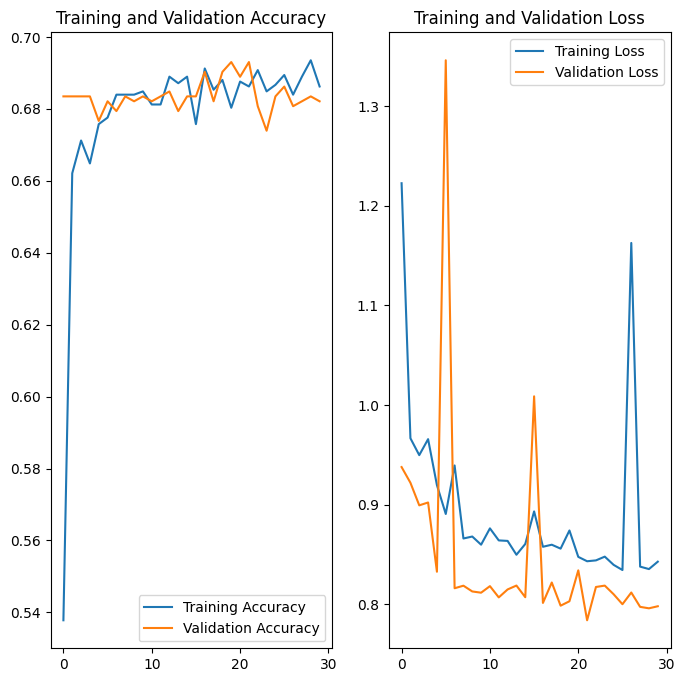

46/46 [==============================] - 5s 111ms/step
                  precision    recall  f1-score   support

            Mild       0.00      0.00      0.00        74
        Moderate       0.53      0.81      0.64       200
           No_DR       0.81      0.96      0.88       361
Proliferative_DR       0.00      0.00      0.00        59
          Severe       0.00      0.00      0.00        39

        accuracy                           0.69       733
       macro avg       0.27      0.35      0.30       733
    weighted avg       0.54      0.69      0.61       733



c:\Users\rania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

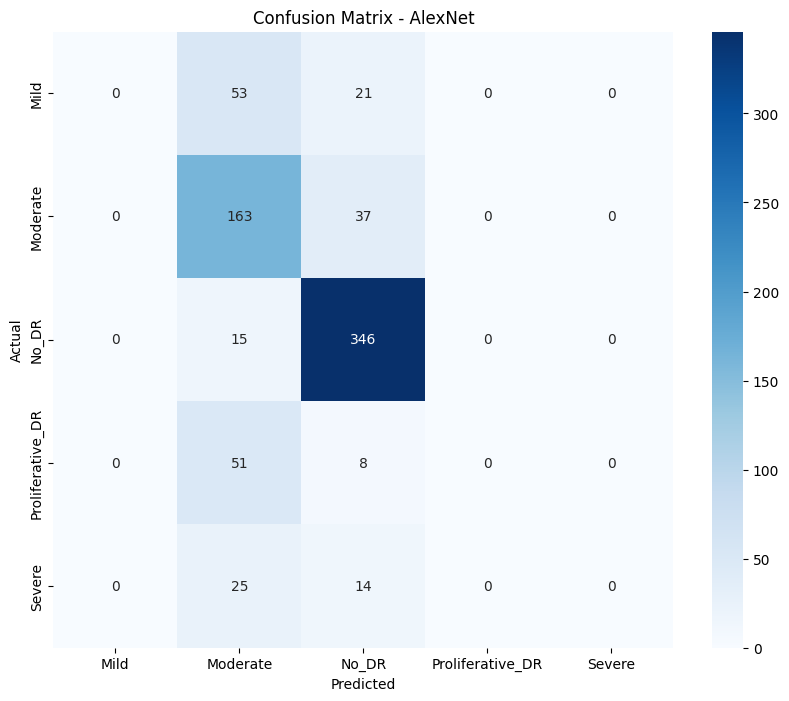

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

model_alexnet = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model_alexnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
checkpoint = ModelCheckpoint('path/dataset/checkpoints/best_model_alexnet.keras', monitor='val_loss', save_best_only=True)

# Train the model
history_alexnet = model_alexnet.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the entire model
model_alexnet.save('path/dataset/checkpoints/final_model_alexnet.keras')

# Evaluate the model on the test set
test_loss_alexnet, test_acc_alexnet = model_alexnet.evaluate(test_generator)
print(f'Test Accuracy for AlexNet: {test_acc_alexnet * 100:.2f}%')


# Function to plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history for AlexNet
plot_training_history(history_alexnet)

# Predictions on the test set
y_pred_alexnet = model_alexnet.predict(test_generator)
y_pred_classes_alexnet = np.argmax(y_pred_alexnet, axis=1)
y_true_alexnet = test_generator.classes

# Classification report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true_alexnet, y_pred_classes_alexnet, target_names=class_labels))

# Confusion matrix
conf_matrix_alexnet = confusion_matrix(y_true_alexnet, y_pred_classes_alexnet)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_alexnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - AlexNet')
plt.show()


<h1>VGG19</h1>

Epoch 1/30
138/138 [==============================] - 1023s 7s/step - loss: 12.6024 - accuracy: 0.4567 - val_loss: 1.3183 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 2/30
138/138 [==============================] - 1038s 7s/step - loss: 1.3349 - accuracy: 0.4727 - val_loss: 1.3084 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 3/30
138/138 [==============================] - 1032s 7s/step - loss: 1.3133 - accuracy: 0.4904 - val_loss: 1.3046 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 4/30
138/138 [==============================] - 1044s 8s/step - loss: 1.3076 - accuracy: 0.4923 - val_loss: 1.3059 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 5/30
138/138 [==============================] - 1015s 7s/step - loss: 1.3100 - accuracy: 0.4913 - val_loss: 1.2953 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 6/30
138/138 [==============================] - 1020s 7s/step - loss: 1.2967 - accuracy: 0.4923 - val_loss: 1.2936 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 7/30
138/138 [==============================] - 103

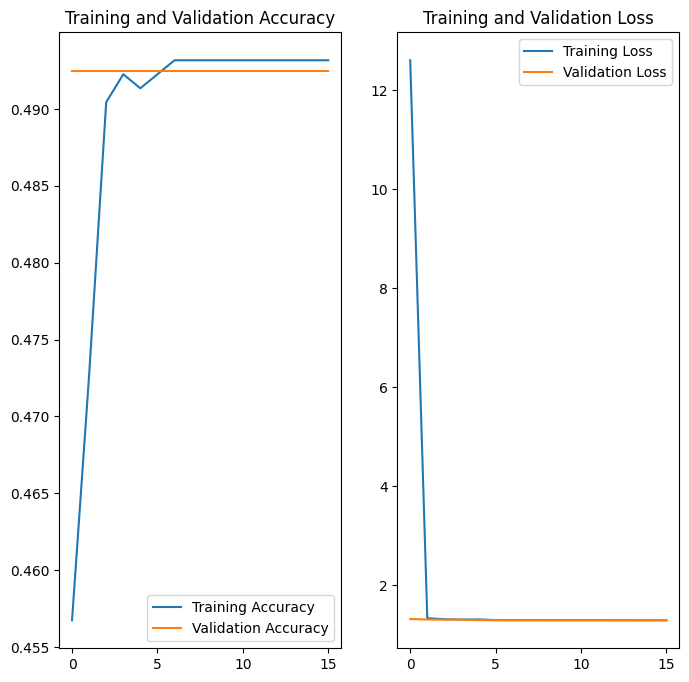

46/46 [==============================] - 81s 2s/step
                  precision    recall  f1-score   support

            Mild       0.00      0.00      0.00        74
        Moderate       0.00      0.00      0.00       200
           No_DR       0.49      1.00      0.66       361
Proliferative_DR       0.00      0.00      0.00        59
          Severe       0.00      0.00      0.00        39

        accuracy                           0.49       733
       macro avg       0.10      0.20      0.13       733
    weighted avg       0.24      0.49      0.33       733



c:\Users\rania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

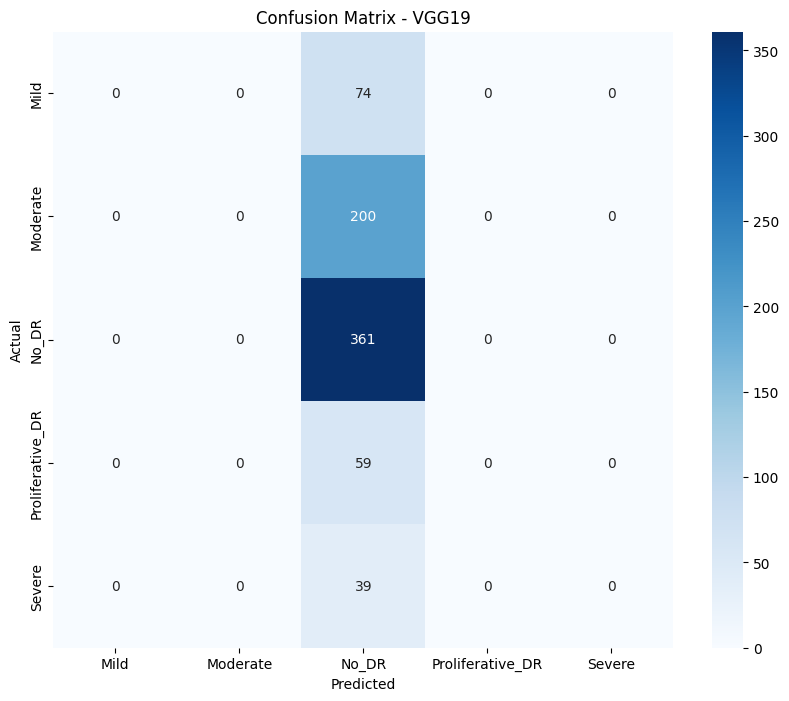

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the VGG19 model with pre-trained ImageNet weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
model_vgg19 = Model(inputs=base_model.input, outputs=predictions)

# Compile the VGG19 model
model_vgg19.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
checkpoint = ModelCheckpoint('path/dataset/checkpoints/best_model_vgg19.keras', monitor='val_loss', save_best_only=True)

# Train the VGG19 model
history_vgg19 = model_vgg19.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the entire VGG19 model after training
model_vgg19.save('path/dataset/checkpoints/final_model_vgg19.keras')

# Evaluate the VGG19 model on the test set
test_loss_vgg19, test_acc_vgg19 = model_vgg19.evaluate(test_generator)
print(f'Test Accuracy for VGG19: {test_acc_vgg19 * 100:.2f}%')

# Function to plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history for VGG19
plot_training_history(history_vgg19)

# Predictions on the test set
y_pred_vgg19 = model_vgg19.predict(test_generator)
y_pred_classes_vgg19 = np.argmax(y_pred_vgg19, axis=1)
y_true_vgg19 = test_generator.classes

# Classification report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true_vgg19, y_pred_classes_vgg19, target_names=class_labels))

# Confusion matrix
conf_matrix_vgg19 = confusion_matrix(y_true_vgg19, y_pred_classes_vgg19)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_vgg19, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - VGG19')
plt.show()


<h1>DenseNet</h1>



29084464/29084464 [==============================] - 1s 0us/step
Epoch 1/30


138/138 [==============================] - 326s 2s/step - loss: 1.0235 - accuracy: 0.6639 - val_loss: 1.1396 - val_accuracy: 0.5825 - lr: 0.0010
Epoch 2/30
138/138 [==============================] - 286s 2s/step - loss: 0.7815 - accuracy: 0.7149 - val_loss: 1.5259 - val_accuracy: 0.6658 - lr: 0.0010
Epoch 3/30
138/138 [==============================] - 284s 2s/step - loss: 0.7028 - accuracy: 0.7309 - val_loss: 5.3804 - val_accuracy: 0.6903 - lr: 0.0010
Epoch 4/30
138/138 [==============================] - 303s 2s/step - loss: 0.6810 - accuracy: 0.7491 - val_loss: 0.8724 - val_accuracy: 0.6944 - lr: 0.0010
Epoch 5/30
138/138 [==============================] - 382s 3s/step - loss: 0.6517 - accuracy: 0.7555 - val_loss: 0.7199 - val_accuracy: 0.7694 - lr: 0.0010
Epoch 6/30
138/138 [==============================] - 281s 2s/step - loss: 0.6186 - accuracy: 0.7700 - val_loss: 0.9820 - val_accuracy: 0.7026 - lr: 0.

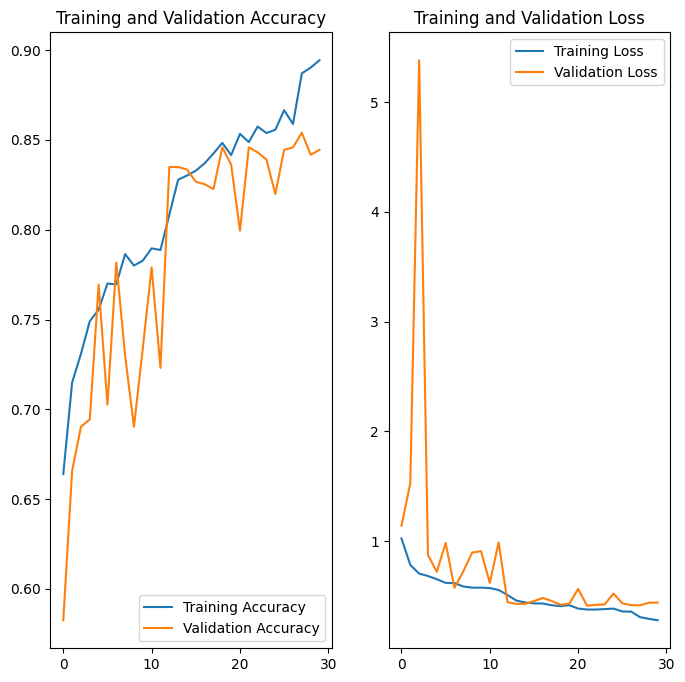

46/46 [==============================] - 25s 509ms/step
                  precision    recall  f1-score   support

            Mild       0.54      0.59      0.56        74
        Moderate       0.70      0.80      0.75       200
           No_DR       0.98      0.97      0.98       361
Proliferative_DR       0.67      0.44      0.53        59
          Severe       0.30      0.21      0.24        39

        accuracy                           0.80       733
       macro avg       0.64      0.60      0.61       733
    weighted avg       0.80      0.80      0.80       733



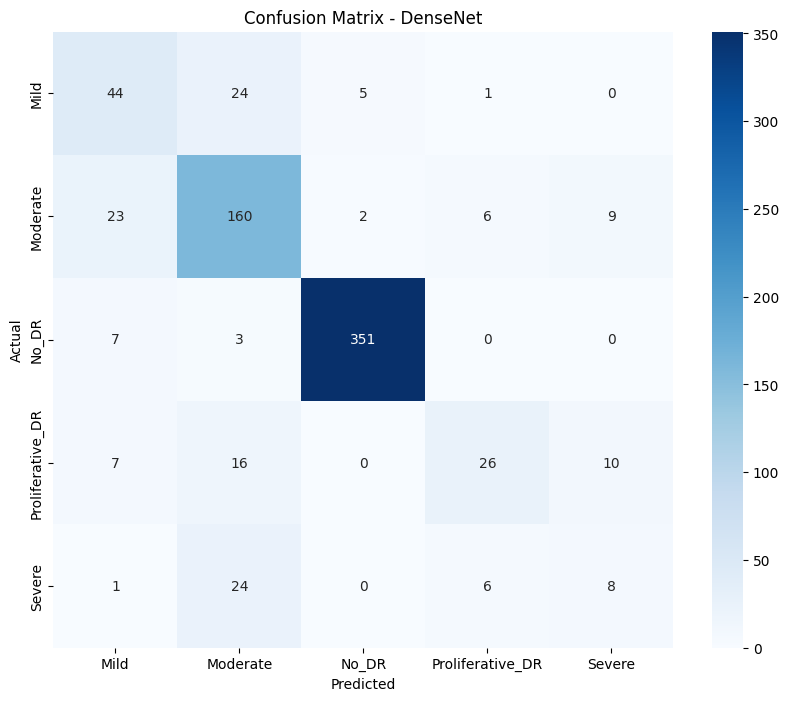

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Load the DenseNet121 base model, excluding the top (fully connected) layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert the features to a single vector per feature map
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Final output layer with softmax activation

# Create the full model by specifying the inputs and outputs
model_densenet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_densenet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
checkpoint = ModelCheckpoint('path/dataset/checkpoints/best_model_densenet.keras', monitor='val_loss', save_best_only=True)

# Train the DenseNet model
history_densenet = model_densenet.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the entire DenseNet model after training
model_densenet.save('path/dataset/checkpoints/final_model_densenet.keras')

# Evaluate the DenseNet model on the test set
test_loss_densenet, test_acc_densenet = model_densenet.evaluate(test_generator)
print(f'Test Accuracy for DenseNet: {test_acc_densenet * 100:.2f}%')

# Function to plot training history (same as before)
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history for DenseNet
plot_training_history(history_densenet)

# Predictions on the test set
y_pred_densenet = model_densenet.predict(test_generator)
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)
y_true_densenet = test_generator.classes

# Classification report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true_densenet, y_pred_classes_densenet, target_names=class_labels))

# Confusion matrix
conf_matrix_densenet = confusion_matrix(y_true_densenet, y_pred_classes_densenet)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_densenet, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - DenseNet')
plt.show()


<h1>ResNet-50</h1>



94765736/94765736 [==============================] - 16s 0us/step
Epoch 1/30


138/138 [==============================] - 320s 2s/step - loss: 1.3485 - accuracy: 0.6211 - val_loss: 1.4131 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 2/30
138/138 [==============================] - 335s 2s/step - loss: 0.9425 - accuracy: 0.6794 - val_loss: 1.4196 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 3/30
138/138 [==============================] - 356s 3s/step - loss: 0.8483 - accuracy: 0.7181 - val_loss: 1.3672 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 4/30
138/138 [==============================] - 283s 2s/step - loss: 0.7909 - accuracy: 0.7281 - val_loss: 1.3254 - val_accuracy: 0.4939 - lr: 0.0010
Epoch 5/30
138/138 [==============================] - 278s 2s/step - loss: 0.7531 - accuracy: 0.7327 - val_loss: 2.4564 - val_accuracy: 0.3724 - lr: 0.0010
Epoch 6/30
138/138 [==============================] - 309s 2s/step - loss: 0.7644 - accuracy: 0.7199 - val_loss: 1.2800 - val_accuracy: 0.5471 - lr: 0

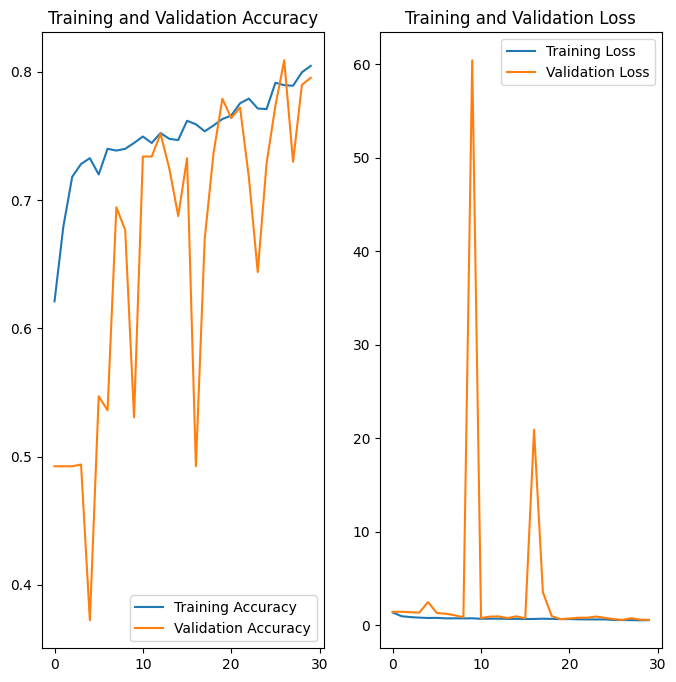

46/46 [==============================] - 29s 598ms/step
                  precision    recall  f1-score   support

            Mild       0.44      0.30      0.35        74
        Moderate       0.61      0.86      0.71       200
           No_DR       0.95      0.96      0.95       361
Proliferative_DR       0.78      0.31      0.44        59
          Severe       0.67      0.15      0.25        39

        accuracy                           0.77       733
       macro avg       0.69      0.52      0.54       733
    weighted avg       0.77      0.77      0.75       733



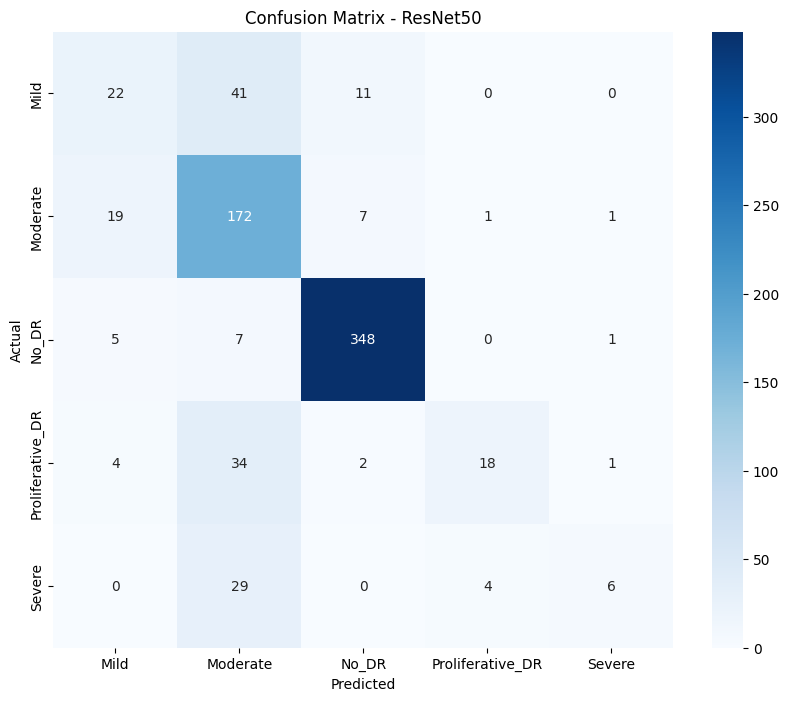

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the ResNet50 base model, excluding the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert the features to a single vector per feature map
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Final output layer with softmax activation

# Create the full model by specifying the inputs and outputs
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
checkpoint = ModelCheckpoint('path/dataset/checkpoints/best_model_resnet50.keras', monitor='val_loss', save_best_only=True)

# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the entire ResNet50 model after training
model_resnet50.save('path/dataset/checkpoints/final_model_resnet50.keras')

# Evaluate the ResNet50 model on the test set
test_loss_resnet50, test_acc_resnet50 = model_resnet50.evaluate(test_generator)
print(f'Test Accuracy for ResNet50: {test_acc_resnet50 * 100:.2f}%')

# Function to plot training history (same as before)
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history for ResNet50
plot_training_history(history_resnet50)

# Predictions on the test set
y_pred_resnet50 = model_resnet50.predict(test_generator)
y_pred_classes_resnet50 = np.argmax(y_pred_resnet50, axis=1)
y_true_resnet50 = test_generator.classes

# Classification report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true_resnet50, y_pred_classes_resnet50, target_names=class_labels))

# Confusion matrix
conf_matrix_resnet50 = confusion_matrix(y_true_resnet50, y_pred_classes_resnet50)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resnet50, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - ResNet50')
plt.show()


<h1>EfficientNetB0</h1>

16705208/16705208 [==============================] - 4s 0us/step
Epoch 1/30
138/138 [==============================] - 219s 1s/step - loss: 0.8802 - accuracy: 0.6876 - val_loss: 1.4973 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 2/30
138/138 [==============================] - 182s 1s/step - loss: 0.7040 - accuracy: 0.7495 - val_loss: 2.6254 - val_accuracy: 0.1010 - lr: 0.0010
Epoch 3/30
138/138 [==============================] - 177s 1s/step - loss: 0.6423 - accuracy: 0.7605 - val_loss: 1.4782 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 4/30
138/138 [==============================] - 182s 1s/step - loss: 0.5740 - accuracy: 0.7878 - val_loss: 20.5110 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 5/30
138/138 [==============================] - 177s 1s/step - loss: 0.5702 - accuracy: 0.7864 - val_loss: 1186.7483 - val_accuracy: 0.4925 - lr: 0.0010
Epoch 6/30
138/138 [==============================] - 177s 1s/step - loss: 0.5306 - accuracy: 0.8037 - val_loss: 3.6735 - val_accuracy: 0.4925 - lr: 0.

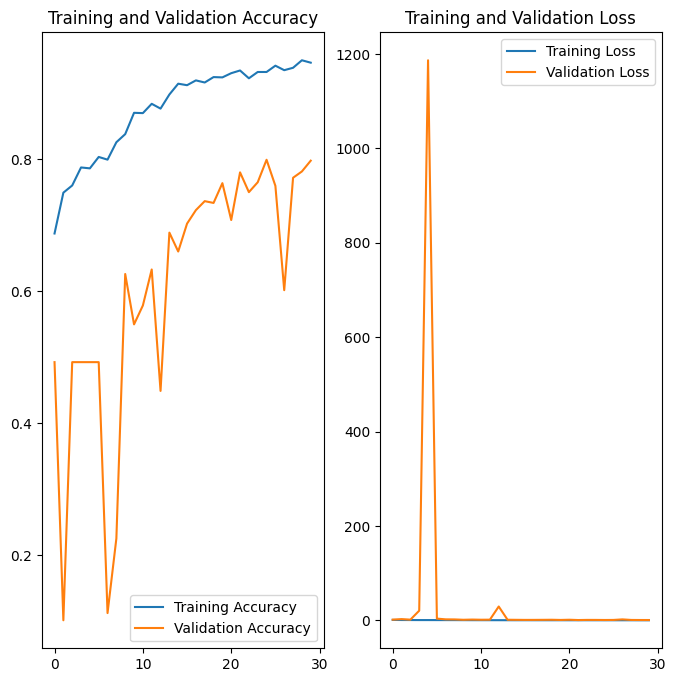

46/46 [==============================] - 13s 252ms/step
                  precision    recall  f1-score   support

            Mild       0.47      0.59      0.53        74
        Moderate       0.76      0.69      0.73       200
           No_DR       0.95      0.99      0.97       361
Proliferative_DR       0.56      0.46      0.50        59
          Severe       0.33      0.28      0.31        39

        accuracy                           0.79       733
       macro avg       0.62      0.60      0.61       733
    weighted avg       0.78      0.79      0.78       733



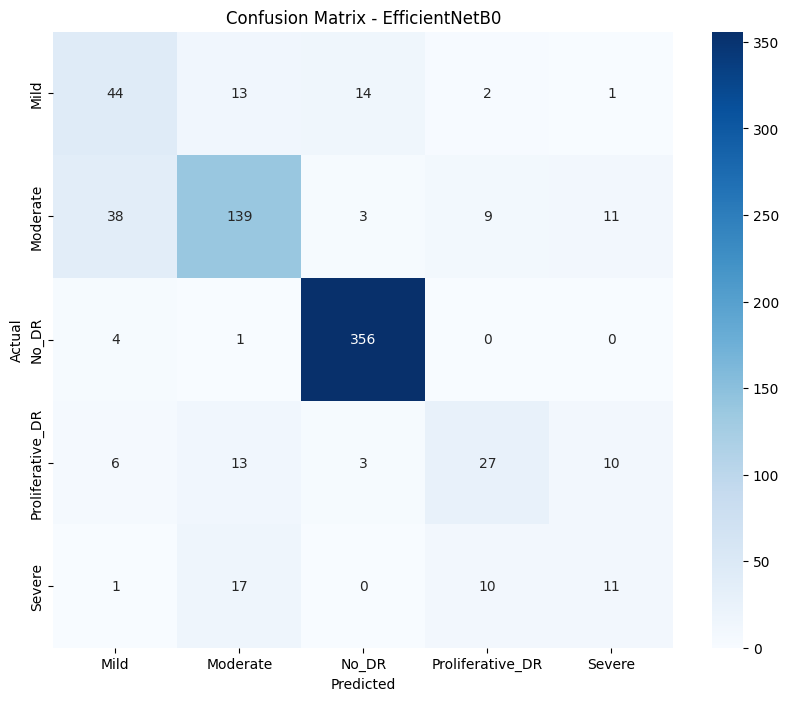

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Load the EfficientNetB0 base model, excluding the top (fully connected) layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert the features to a single vector per feature map
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Final output layer with softmax activation

# Create the full model by specifying the inputs and outputs
model_efficientnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_efficientnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
checkpoint = ModelCheckpoint('path/dataset/checkpoints/best_model_efficientnet.keras', monitor='val_loss', save_best_only=True)

# Train the EfficientNetB0 model
history_efficientnet = model_efficientnet.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the entire EfficientNetB0 model after training
model_efficientnet.save('path/dataset/checkpoints/final_model_efficientnet.keras')

# Evaluate the EfficientNetB0 model on the test set
test_loss_efficientnet, test_acc_efficientnet = model_efficientnet.evaluate(test_generator)
print(f'Test Accuracy for EfficientNetB0: {test_acc_efficientnet * 100:.2f}%')

# Function to plot training history (same as before)
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history for EfficientNetB0
plot_training_history(history_efficientnet)

# Predictions on the test set
y_pred_efficientnet = model_efficientnet.predict(test_generator)
y_pred_classes_efficientnet = np.argmax(y_pred_efficientnet, axis=1)
y_true_efficientnet = test_generator.classes

# Classification report
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true_efficientnet, y_pred_classes_efficientnet, target_names=class_labels))

# Confusion matrix
conf_matrix_efficientnet = confusion_matrix(y_true_efficientnet, y_pred_classes_efficientnet)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_efficientnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - EfficientNetB0')
plt.show()
